# Comparing No Skill Performances

In demos/no_skill_tiles, the notion of no skill performances is defined. In this notebook, we show that while changing prior and prediction rates, some canonical ranking scores remain the same. As expressed in the [*tile paper*](https://arxiv.org/abs/2412.04377), it is possible to obtain the analytical expresion for these points. That leads to a new tile that can be displayed here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sorbetto.tile.tile import Tile
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.annotation.annotation_geometric import AnnotationGeometric

parameterization = ParameterizationDefault()

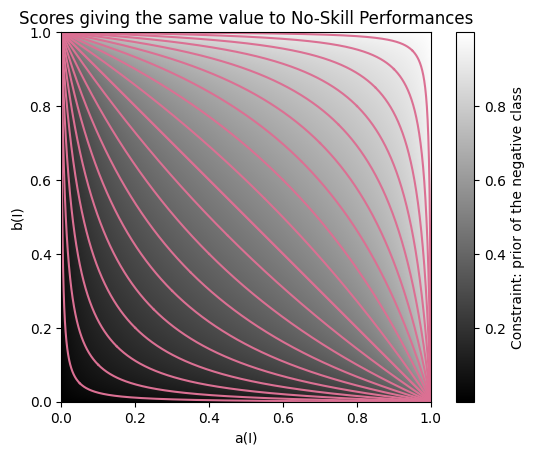

In [17]:
tile = Tile ( parameterization=parameterization,name="Scores giving the same value to No-Skill Performances" )
for prior_pos in np.linspace ( 0.05, 0.95, 19 ) :
    curve = tile.parameterization.locateOrderingsPuttingNoSkillPerformancesOnAnEqualFootingForFixedClassPriors ( prior_pos )
    plt_kwargs = dict ()
    plt_kwargs [ 'c' ] = 'palevioletred'
    annotation = AnnotationGeometric ( curve, **plt_kwargs )
    tile.appendAnnotation ( annotation )
fig, ax = tile.draw ()

x0, x1, y0, y1 = tile.parameterization.getExtent()

mat = np.zeros ((tile.resolution, tile.resolution))
for i, a_i in enumerate(np.linspace(x0+0.001, x1-0.001, tile.resolution)):
    for j, b_i in enumerate(np.linspace(y0+0.001, y1-0.001, tile.resolution)):
        mat[i, j] = ParameterizationDefault.getPriorNegForIsoValuedNoSkillPerformances(a_i, b_i)
im = ax.imshow(mat, extent=(0, 1, 0, 1), origin='lower', cmap='gray')
fig.colorbar(im, ax=ax, label='Constraint: prior of the negative class')
plt.show ()

/tmp/ipykernel_1208369/2573885692.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(im, ax=ax, label='Constraint: rate of negative predictions')


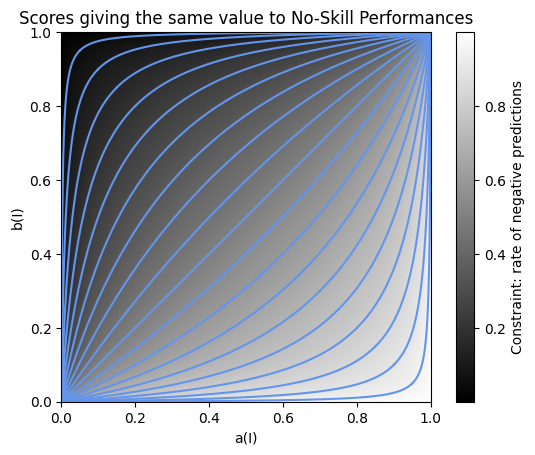

In [18]:
tile = Tile ( parameterization=parameterization, name="Scores giving the same value to No-Skill Performances" )
for rate_pos in np.linspace ( 0.05, 0.95, 19 ) :
    curve = tile.parameterization.locateOrderingsPuttingNoSkillPerformancesOnAnEqualFootingForFixedPredictionRates ( rate_pos )
    plt_kwargs = dict ()
    plt_kwargs [ 'c' ] = 'cornflowerblue'
    annotation = AnnotationGeometric ( curve, **plt_kwargs )
    tile.appendAnnotation ( annotation )
fig, ax = tile.draw ()

x0, x1, y0, y1 = tile.parameterization.getExtent()

mat = np.zeros ((tile.resolution, tile.resolution))
for i, a_i in enumerate(np.linspace(x0+0.001, x1-0.001, tile.resolution)):
    for j, b_i in enumerate(np.linspace(y0+0.001, y1-0.001, tile.resolution)):
        mat[i, j] = ParameterizationDefault.getRatePosPredictionsForIsoValuedNoSkillPerformances(a_i, b_i)
ax.imshow(mat, extent=(0, 1, 0, 1), origin='lower', cmap='gray')
fig.colorbar(im, ax=ax, label='Constraint: rate of negative predictions')

plt.show ()